In [40]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
import pandas_datareader as pdr
key="72d22482fd598f2b8c771820e23189680c6c76cf"

In [43]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [45]:
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')

In [46]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2016-10-19 00:00:00+00:00,117.12,117.76,113.80,117.25,20034594,27.46,27.61,26.68,27.49,80138376,0.00,1.00
1,1,AAPL,2016-10-20 00:00:00+00:00,117.06,117.38,116.33,116.86,24125801,27.44,27.52,27.27,27.39,96503204,0.00,1.00
2,2,AAPL,2016-10-21 00:00:00+00:00,116.60,116.91,116.28,116.81,23192665,27.33,27.41,27.26,27.38,92770660,0.00,1.00
3,3,AAPL,2016-10-24 00:00:00+00:00,117.65,117.74,117.00,117.10,23538673,27.58,27.60,27.43,27.45,94154692,0.00,1.00
4,4,AAPL,2016-10-25 00:00:00+00:00,118.25,118.36,117.31,117.95,48128970,27.72,27.75,27.50,27.65,192515880,0.00,1.00


In [47]:
df1=df.reset_index()['close']
df1

0      117.12
1      117.06
2      116.60
3      117.65
4      118.25
        ...  
1252   142.81
1253   141.51
1254   140.91
1255   143.76
1256   144.84
Name: close, Length: 1257, dtype: float64

In [48]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

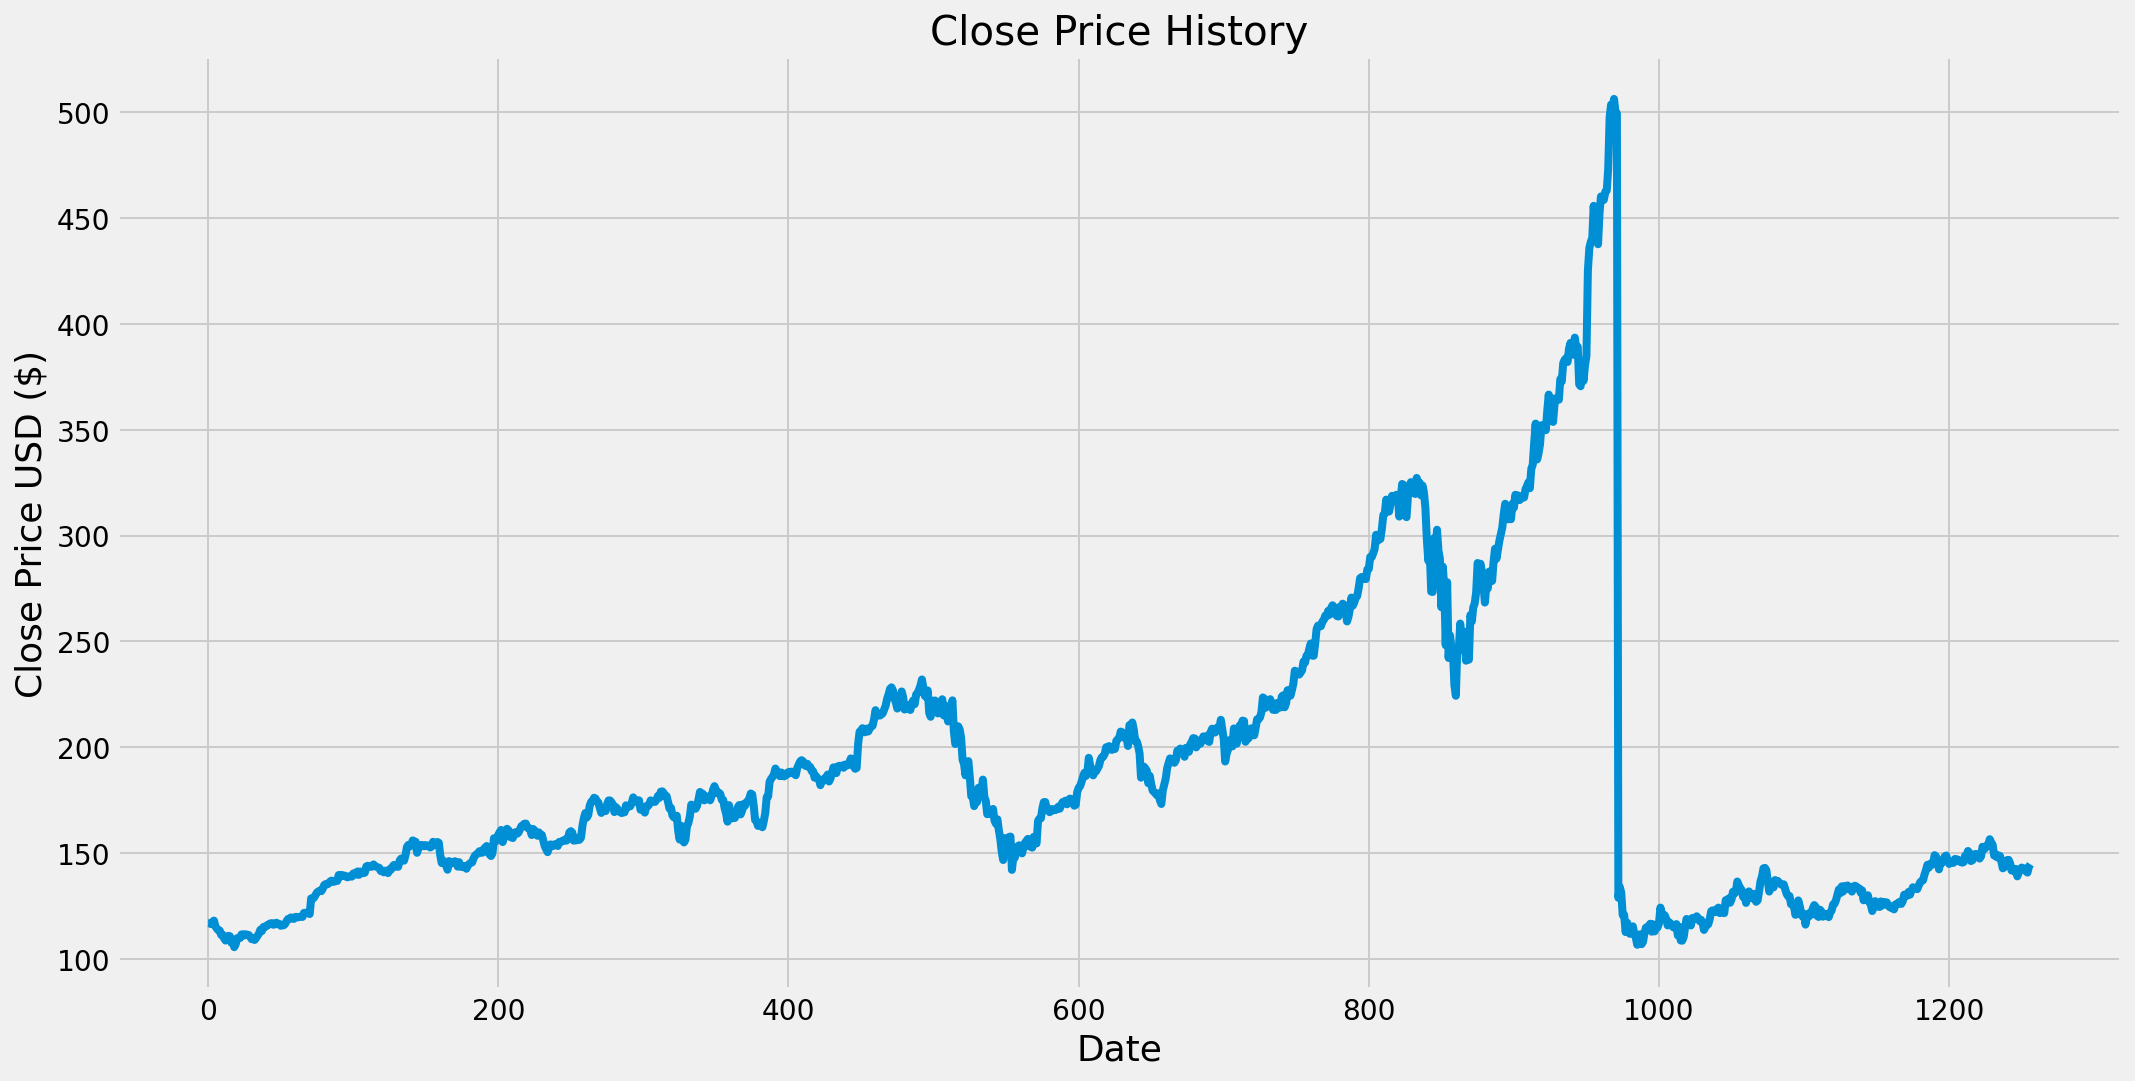

In [13]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [50]:
print(df1)

[[0.02849793]
 [0.02834807]
 [0.02719916]
 ...
 [0.08791648]
 [0.09503472]
 [0.09773215]]


In [51]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [52]:
training_size,test_size

(817, 440)

In [53]:
train_data

array([[0.02849793],
       [0.02834807],
       [0.02719916],
       [0.02982167],
       [0.03132025],
       [0.02467656],
       [0.02190419],
       [0.02000599],
       [0.01955642],
       [0.01443629],
       [0.01468605],
       [0.01029022],
       [0.00781757],
       [0.01173885],
       [0.01336231],
       [0.01291273],
       [0.00519506],
       [0.00679355],
       [0.        ],
       [0.00349668],
       [0.01068984],
       [0.01058994],
       [0.01086468],
       [0.01503572],
       [0.01521055],
       [0.0137869 ],
       [0.01518557],
       [0.0146361 ],
       [0.01436136],
       [0.01201359],
       [0.00944103],
       [0.01046506],
       [0.00849193],
       [0.01058994],
       [0.01328738],
       [0.01600979],
       [0.02058045],
       [0.01895699],
       [0.02367751],
       [0.02367751],
       [0.02525101],
       [0.02562566],
       [0.02729907],
       [0.02807333],
       [0.02834807],
       [0.0264249 ],
       [0.02699935],
       [0.028

In [54]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [55]:
import numpy
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [56]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [57]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [58]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 317ms/step - loss: 0.0179 - val_loss: 0.0305
Epoch 2/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0037 - val_loss: 0.0261
Epoch 3/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0019 - val_loss: 0.0212
Epoch 4/100
12/12 [==============================] - 3s 211ms/step - loss: 9.0032e-04 - val_loss: 0.0221
Epoch 5/100
12/12 [==============================] - 3s 215ms/step - loss: 5.3905e-04 - val_loss: 0.0277
Epoch 6/100
12/12 [==============================] - 3s 222ms/step - loss: 4.8974e-04 - val_loss: 0.0247
Epoch 7/100
12/12 [==============================] - 3s 218ms/step - loss: 4.8405e-04 - val_loss: 0.0231
Epoch 8/100
12/12 [==============================] - 3s 218ms/step - loss: 4.4890e-04 - val_loss: 0.0251
Epoch 9/100
12/12 [==============================] - 3s 222ms/step - loss: 4.2305e-04 - val_loss: 0.0252
Epoch 10/100
12/12 [==============================] - 3s 210ms/step

In [61]:
import tensorflow as tf

In [62]:
tf.__version__ #version check

'2.6.0'

In [63]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [64]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [65]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

189.5664539006992

In [66]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

212.20699133270168

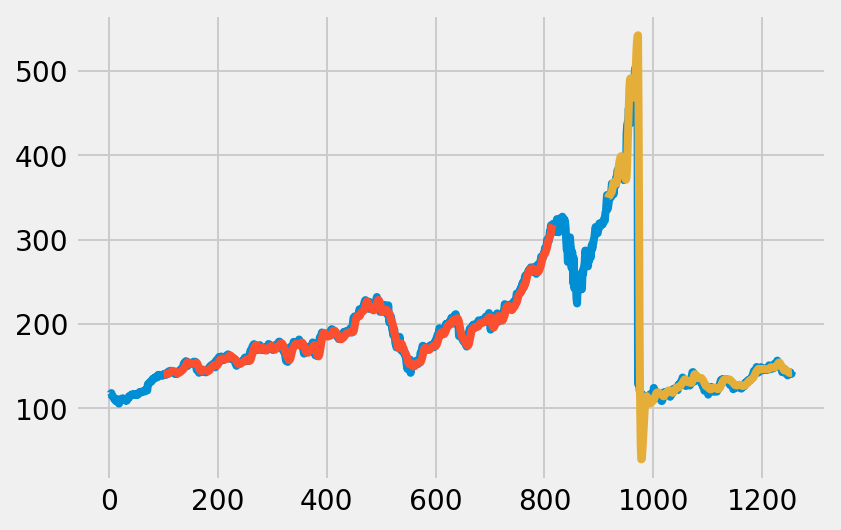

In [32]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()